In [1]:
import plotly.graph_objects as go 

In [2]:
def dms_to_dd(dms_str):
    # Example: "092108.45N" or "0993149.01E"
    deg = int(dms_str[0:2 if 'N' in dms_str or 'S' in dms_str else 3])
    min_ = int(dms_str[2:4 if 'N' in dms_str or 'S' in dms_str else 4])
    sec = float(dms_str[4:-1])
    hemi = dms_str[-1]

    dd = deg + min_/60 + sec/3600
    if hemi in ['S', 'W']:
        dd *= -1
    return dd

In [3]:
coords_raw = [
    ("092108.45N", "0993149.01E"),
    ("103415.64N", "0995439.12E"),
    ("094830.78N", "1001754.79E"),
    ("081808.39N", "1001550.28E"),
    ("081828.66N", "0994352.24E"),
    ("083107.99N", "0993638.33E"),
    ("085743.18N", "0993640.94E"),
    ("092108.45N", "0993149.01E")  # closing the polygon
]

# Convert to decimal degrees
lats = [dms_to_dd(lat) for lat, lon in coords_raw]
lons = [dms_to_dd(lon) for lat, lon in coords_raw]

In [24]:
coords2_raw = [
    ("092847.28N", "0993411.75E"),
    ("100005.16N", "0994357.26E"),
    ("100000.95N", "0995504.62E"),
    ("093017.70N", "0994547.49E"),
    ("092847.28N", "0993411.75E")  # closing
]

lats2 = [dms_to_dd(lat) for lat, lon in coords2_raw]
lons2 = [dms_to_dd(lon) for lat, lon in coords2_raw]

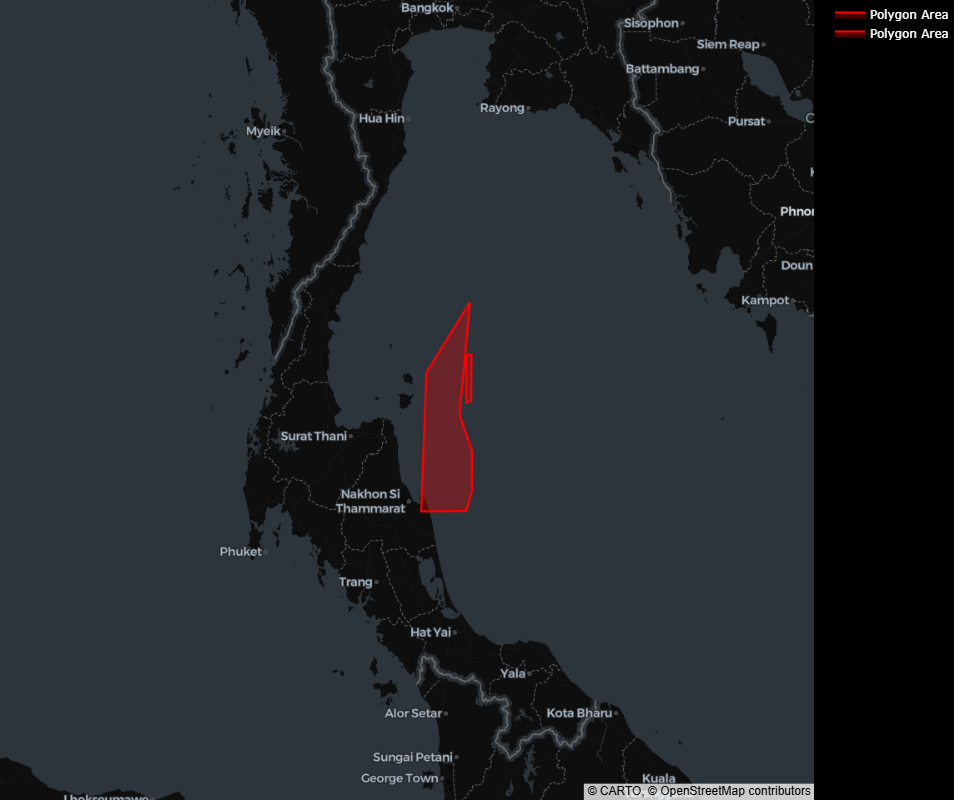

In [25]:
import plotly.graph_objects as go

fig = go.Figure()

# Polygon (as line + fill)
fig.add_trace(go.Scattermap(
    lat=lats,
    lon=lons,
    mode="lines",
    fill="toself",
    line=dict(color="red", width=2),
    fillcolor="rgba(255,0,0,0.3)",
    name="Polygon Area"
))

fig.add_trace(go.Scattermap(
    lat=lats2,
    lon=lons2,
    mode="lines",
    fill="toself",
    line=dict(color="red", width=2),
    fillcolor="rgba(255,0,0,0.3)",
    name="Polygon Area"
))


fig.update_layout(
    map_style='dark',
    margin=dict(l=0, r=0, t=0, b=0),
    paper_bgcolor="black",
    plot_bgcolor="black",
    font=dict(color="white"),
    width =600,height=800,
    map=dict(
        bearing=0,
        center=dict(
            lat=9.512017,
            lon=100.013596
        ),
        pitch=0,
        zoom=6
    ),
)

fig.show()